Introduction

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Purpose in work - to analyse the given data and to explore the influence of elements using regression model.

# Data from: https://archive.ics.uci.edu/dataset/222/bank+marketing#

In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv("bank_marketing_dataset.csv", sep='\t')

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,has_deposit,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False


In [18]:
# Using info() we can see what kind of columns are in the data frame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [19]:
# This shows statistics of the DataFrame, such as count, mean, minimum, and maximum values for each numeric column.

df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
# Check missing values by a variable.

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
has_deposit       0
target            0
dtype: int64

In [21]:
# This selects numeric type of columns from DataFrame (float, int)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

In [22]:
# This selects non-numeric type of columns from DataFrame (object, boolean)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [23]:
print(f"This shows us columns with numeric type of data: {', '.join(numeric_cols)}, and non-numeric type of data: {', '.join(non_numeric_cols)} in our DataFramework.")

'This shows us columns with numeric type of data: age, duration, campaign, pdays, previous, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed, and non-numeric type of data: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, has_deposit, target in our DataFramework.'

In [24]:
# Here we check if all values are correct.

values = []
for col_name in non_numeric_cols:
    values = df[col_name].unique()
    print(f'{col_name}: {values}')

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
has_deposit: ['no' 'yes']
target: [False  True]


In [49]:
# Count the number of clients with previous outcome as 'success' and success in this campaign

previous_success = df[df['poutcome'] == 'success']
this_campaign_count = df['has_deposit'].value_counts()
count_yes = this_campaign_count['yes']

# Count the number of clients with previous outcome as 'success' and success in this campaign

count_previous_and_success = previous_success['target'].sum()

print(f"{count_previous_and_success} from previous campaign of {count_yes} clients from this campaign have subscribed to this campaign.")

894 from previous campaign of 4640 clients from this campaign have subscribed to this campaign.


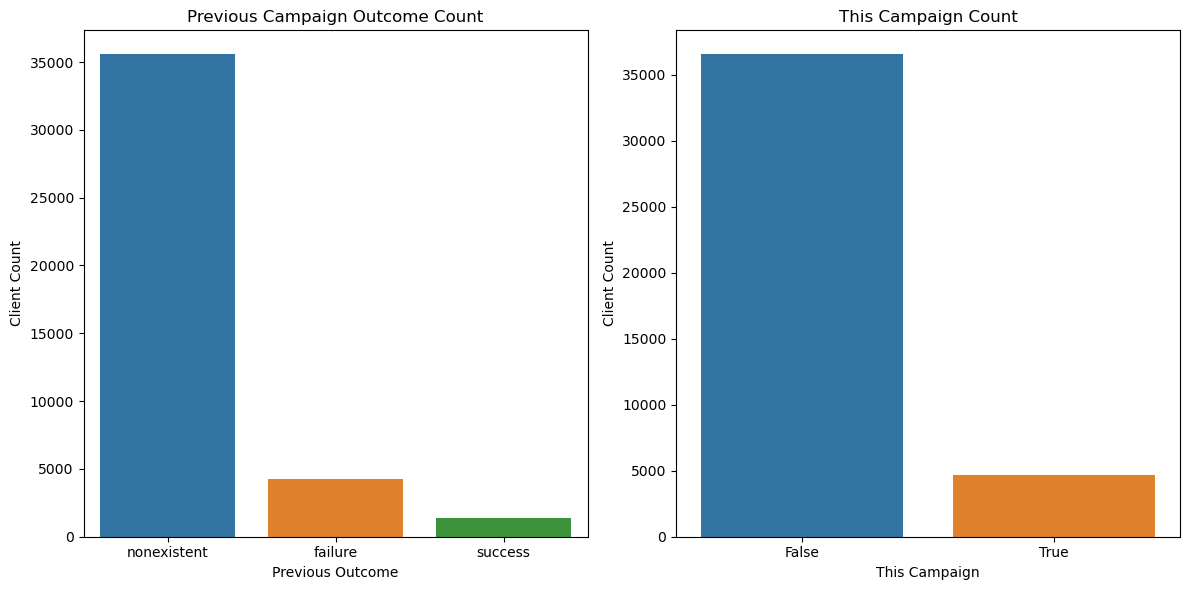

In [26]:
plt.figure(figsize=(12, 6))

# First subplot - Previous Outcome Count
plt.subplot(1, 2, 1)
sns.countplot(x='poutcome', data=df)
plt.xlabel('Previous Outcome')
plt.ylabel('Client Count')
plt.title('Previous Campaign Outcome Count')

# Second subplot - This Campaign Count
plt.subplot(1, 2, 2)
sns.countplot(x='target', data=df)
plt.xlabel('This Campaign')
plt.ylabel('Client Count')
plt.title('This Campaign Count')

plt.tight_layout()

plt.show()

We can see that most of the clients didn't have any contact before this campaign. However, there were still about 20 % that subscribed again.

In [27]:
# Distribution of 'target' values (False and True) for each unique value in the 'marital' column.

marital_status_table = pd.crosstab(df['marital'], df['target'])
marital_status_table

target,False,True
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


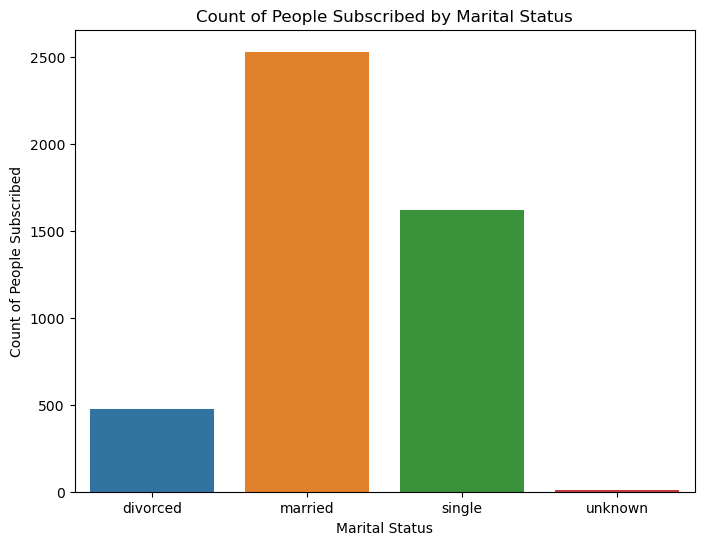

In [28]:
# This counts clients that subscribed a term deposit and clients that have not subcribed according to their marital status.
counts_by_marital = df.groupby('marital')['target'].sum()

# Plot shows clients that subscribed.
plt.figure(figsize=(8, 6))
sns.barplot(x=counts_by_marital.index, y=counts_by_marital.values)
plt.xlabel('Marital Status')
plt.ylabel('Count of People Subscribed')
plt.title('Count of People Subscribed by Marital Status')
plt.show()

Here we can see how marital status of the client is influenced to subscribe a term deposit. In marital status table we can see that about half of the clients are married. Because married people are the majority of the clients, therefore they subscribed more than others.

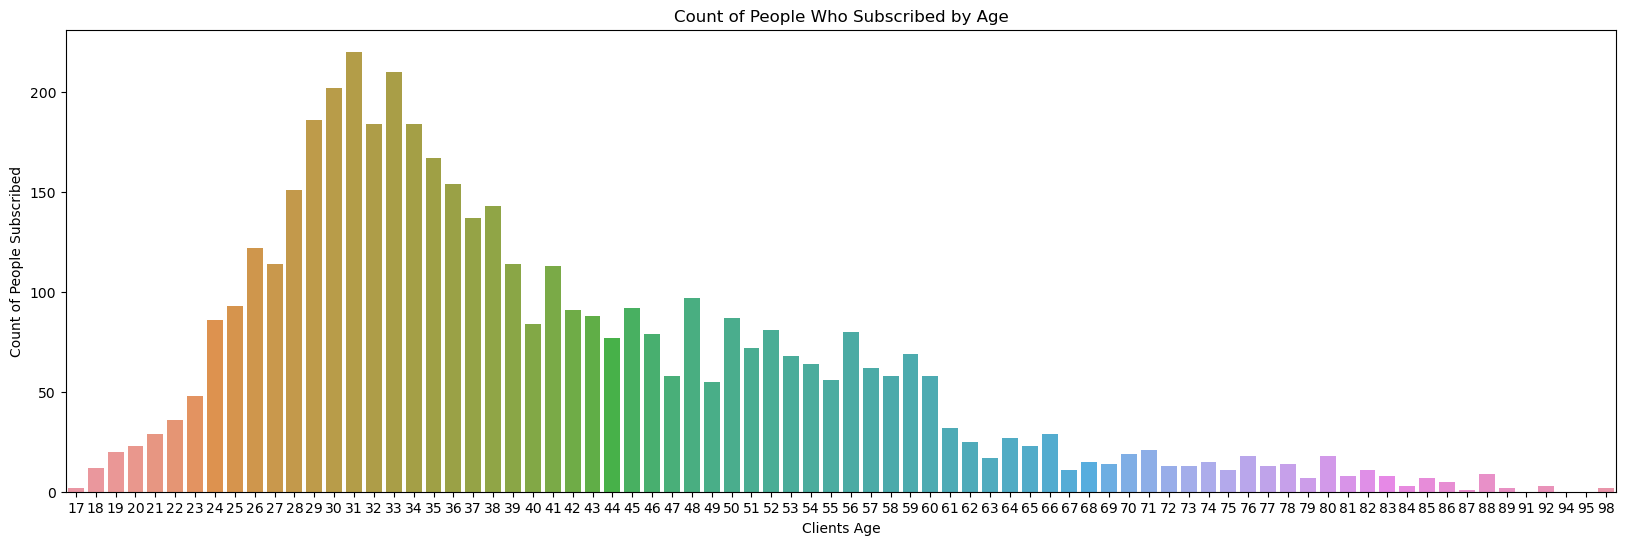

In [29]:
# This counts clients that subscribed a term deposit and clients that have not subscribed according to their age.
counts_by_age = df.groupby('age')['target'].sum()

# Plot shows clients that subscribed.
plt.figure(figsize=(20, 6))
sns.barplot(x=counts_by_age.index, y=counts_by_age.values)
plt.xlabel('Clients Age')
plt.ylabel('Count of People Subscribed')
plt.title('Count of People Who Subscribed by Age')
plt.show()

Here we can see that most client who subscribed are 25 to 40 years old, there is much less subscribed-clients in age group bellow 24 and older than 60 years old.

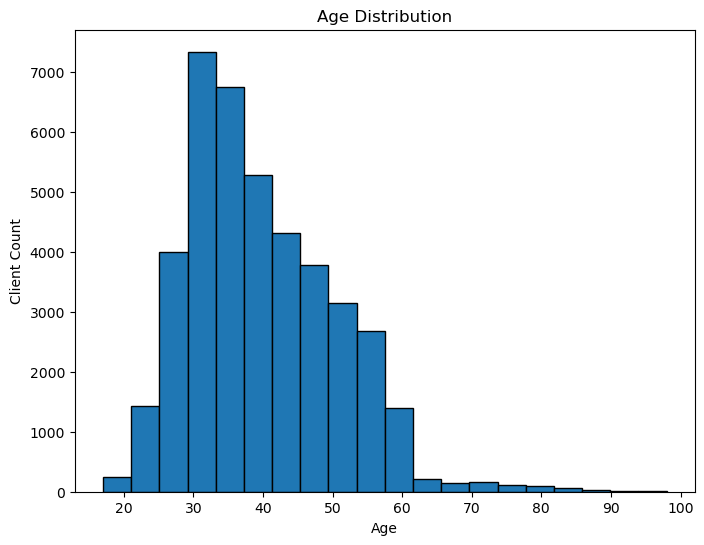

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Client Count')
plt.title('Age Distribution')
plt.show()

There are more clients in age 30 to 45 than any other age that was in this campaign.

In [31]:
# This counts clients that subscribed a term deposit and clients that have not subscribed according to their employment position.

position_of_employment_table = pd.crosstab(df['job'], df['target'])
position_of_employment_table

target,False,True
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


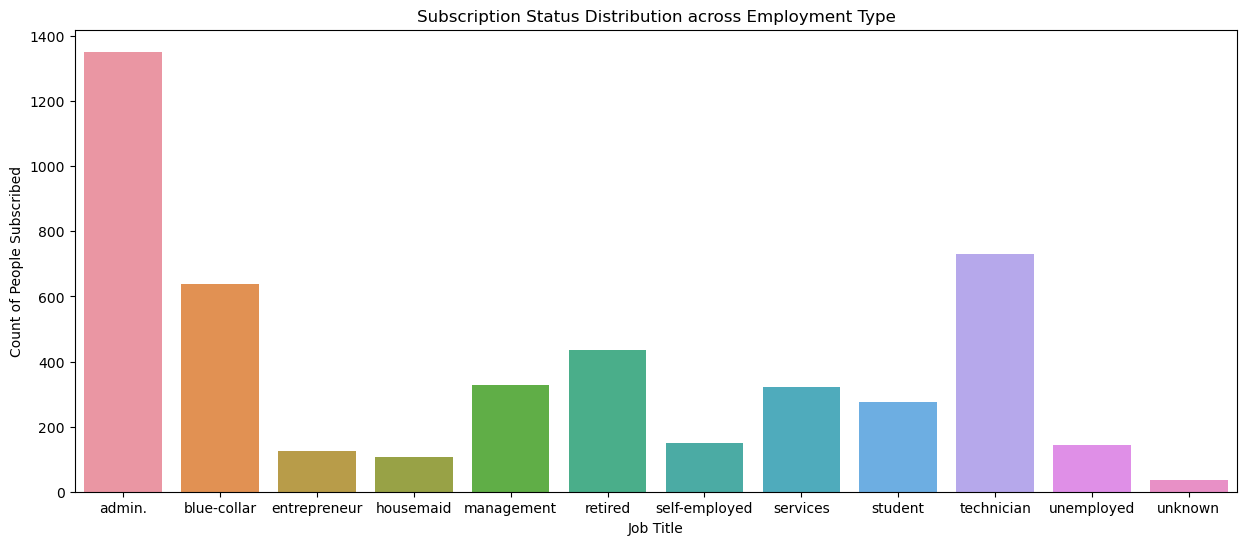

In [32]:
# This count clients of 'job' column, and then the sum of 'target' values (True/False) will be calculated for each group.
counts_by_job = df.groupby('job')['target'].sum()

# Plot shows clients that subscribed.
plt.figure(figsize=(15, 6))
sns.barplot(x=counts_by_job.index, y=counts_by_job.values)
plt.xlabel('Job Title')
plt.ylabel('Count of People Subscribed')
plt.title('Subscription Status Distribution across Employment Type')
plt.show()

Clients are more willingly subscribing to term deposit if they are working as admin, technician or have a blue-collar job. Retired, unemployed, students and others subscribe much less.

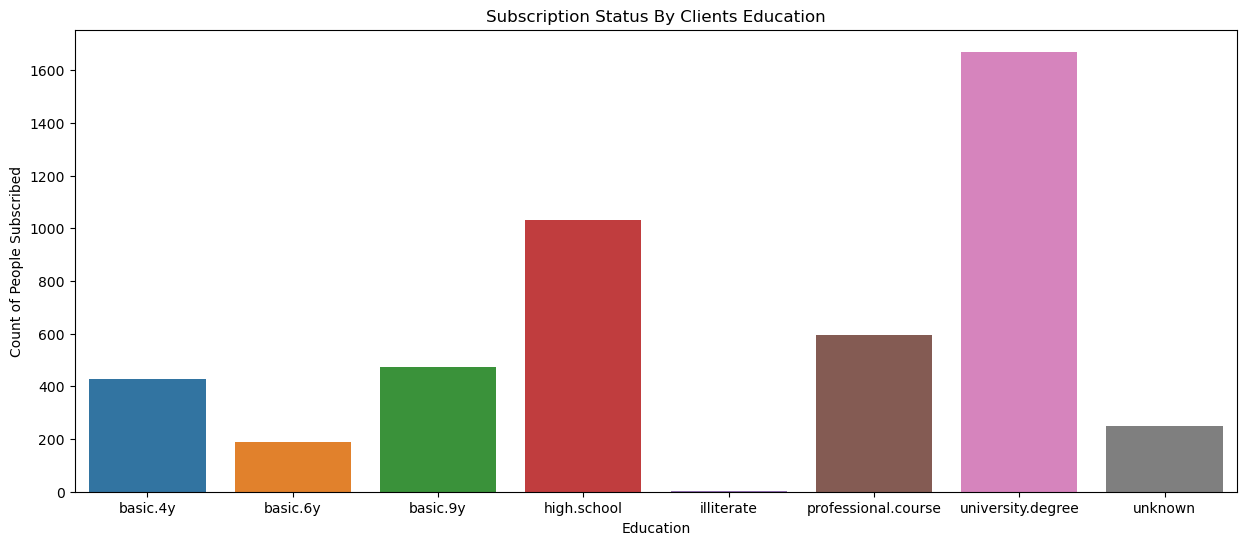

In [33]:
# This count clients of 'education' column, and then the sum of 'target' values (True/False) will be calculated for each group.
counts_by_education = df.groupby('education')['target'].sum()

# Plot shows clients that subscribed.
plt.figure(figsize=(15, 6))
sns.barplot(x=counts_by_education.index, y=counts_by_education.values)
plt.xlabel('Education')
plt.ylabel('Count of People Subscribed')
plt.title('Subscription Status By Clients Education')
plt.show()

Here we can see how clients subscribed depending on their education level. People with university degree subscribed the most.

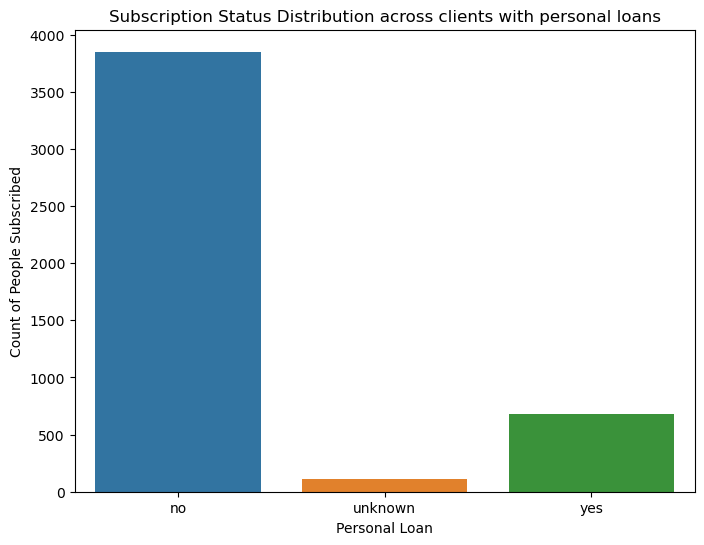

In [34]:
# This count clients of 'loan' column, and then the sum of 'target' values (True/False) will be calculated for each group.
counts_by_personal_loan = df.groupby('loan')['target'].sum()

# Plot shows clients that subscribed.
plt.figure(figsize=(8, 6))
sns.barplot(x=counts_by_personal_loan.index, y=counts_by_personal_loan.values)
plt.xlabel('Personal Loan')
plt.ylabel('Count of People Subscribed')
plt.title('Subscription Status Distribution across clients with personal loans')
plt.show()

Clients without personal loans have subcribed more than clients with loan.

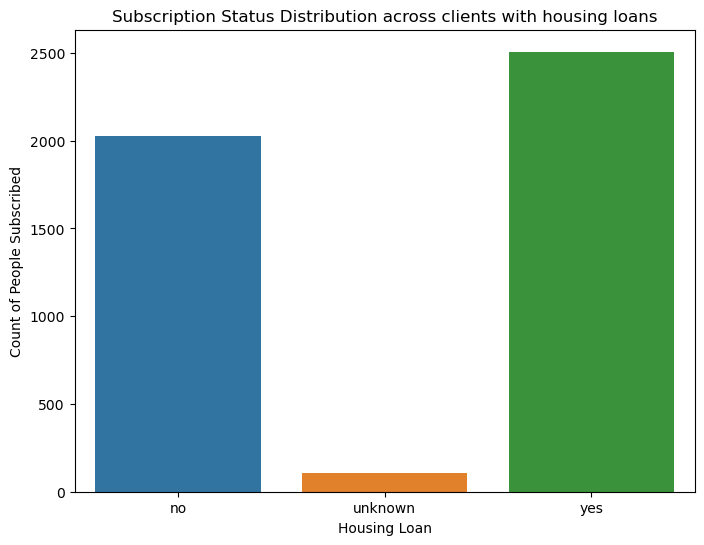

In [35]:
# This count clients of 'loan' column, and then the sum of 'target' values (True/False) will be calculated for each group.
counts_by_housing_loan = df.groupby('housing')['target'].sum()

# Plot shows clients that subscribed.
plt.figure(figsize=(8, 6))
sns.barplot(x=counts_by_housing_loan.index, y=counts_by_housing_loan.values)
plt.xlabel('Housing Loan')
plt.ylabel('Count of People Subscribed')
plt.title('Subscription Status Distribution across clients with housing loans')
plt.show()

Clients with or without housing loans have subcribed similary.

In [46]:
correlation = df['euribor3m'].corr(df['emp_var_rate'])
print("Correlation between euribor 3 month rate and employment variation rate:", correlation)

Correlation between euribor 3 month rate and employment variation rate: 0.9722446711516143


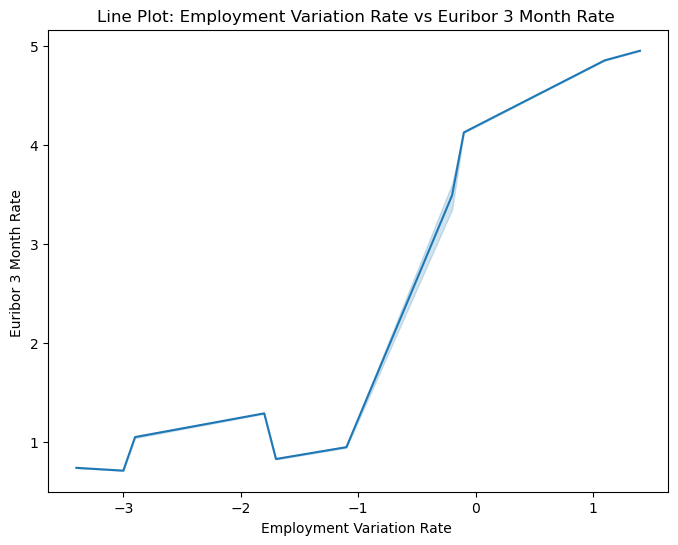

In [37]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='emp_var_rate', y='euribor3m', data=df)
plt.title('Line Plot: Employment Variation Rate vs Euribor 3 Month Rate ')
plt.xlabel('Employment Variation Rate ')
plt.ylabel('Euribor 3 Month Rate ')
plt.show()

Here we can see that the employment rate elevated Euribor elevated as well.

In [45]:
correlation = df['euribor3m'].corr(df['cons_price_idx'])
print("Correlation between Euribor 3 month rate and consumer price index:", correlation)

Correlation between Euribor 3 month rate and consumer price index: 0.6882301070376662


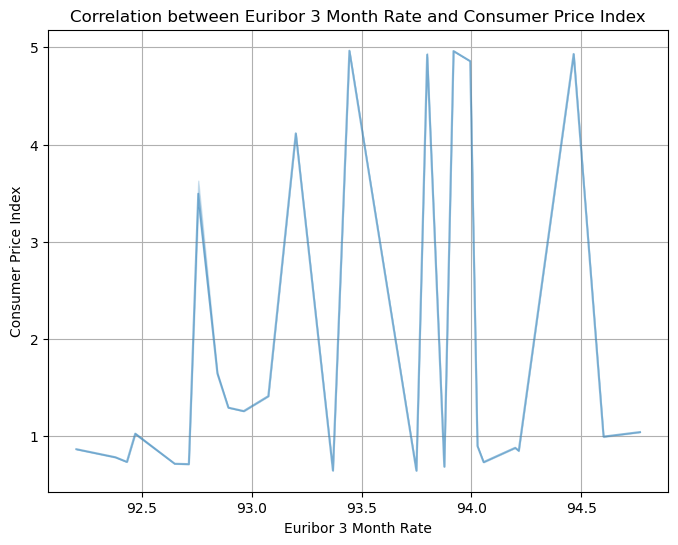

In [39]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='cons_price_idx', y='euribor3m', alpha=0.5)
plt.xlabel('Euribor 3 Month Rate')
plt.ylabel('Consumer Price Index')
plt.title('Correlation between Euribor 3 Month Rate and Consumer Price Index')
plt.grid(True)
plt.show()

As the Consumer Price Index increases, the Euribor tends to increase as well, and other way around.

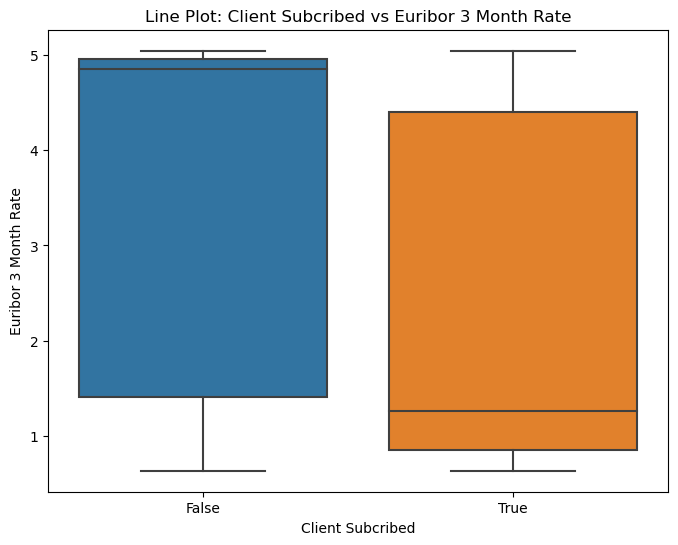

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='euribor3m', data=df)
plt.title('Line Plot: Client Subcribed vs Euribor 3 Month Rate')
plt.xlabel('Client Subcribed')
plt.ylabel('Euribor 3 Month Rate')
plt.show()

Increase in Euribor could have an impact for unsuccsessful subscription.

In [41]:
# This count clients that subscribed a term deposit and clients that have not subcribed acording to number of contacts performed before this campaign and for this client.

number_of_calls_before = pd.crosstab(df['previous'], df['target'])
number_of_calls_before

target,False,True
previous,,
0,32422,3141
1,3594,967
2,404,350
3,88,128
4,32,38
5,5,13
6,2,3
7,1,0


<Figure size 1600x600 with 0 Axes>

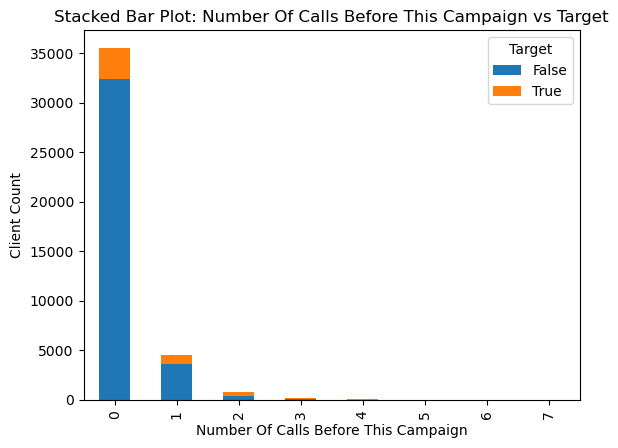

In [42]:
plt.figure(figsize=(16, 6))
number_of_calls_before.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Number Of Calls Before This Campaign vs Target')
plt.xlabel('Number Of Calls Before This Campaign')
plt.ylabel('Client Count')
plt.legend(title='Target', labels=['False', 'True'])
plt.show()

This shows clients who were not contacted before subscribed more than clients who have been contacted for previous campaign.

In [43]:
# This count clients that subscribed a term deposit and clients that have not subcribed acording to number of contacts made during this campaign.

number_of_calls_made = pd.crosstab(df['campaign'], df['target'])
number_of_calls_made

target,False,True
campaign,,
1,15342,2300
2,9359,1211
3,4767,574
4,2402,249
5,1479,120
6,904,75
7,591,38
8,383,17
9,266,17


<Figure size 1600x600 with 0 Axes>

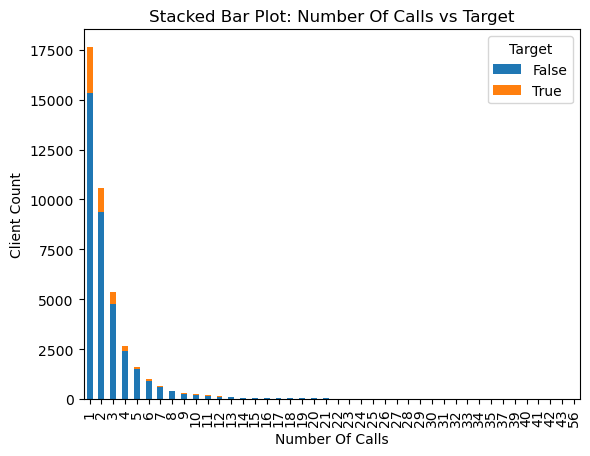

In [44]:
plt.figure(figsize=(16, 6))
number_of_calls_made.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Number Of Calls vs Target')
plt.xlabel('Number Of Calls')
plt.ylabel('Client Count')
plt.legend(title='Target', labels=['False', 'True'])
plt.show()

This plot that number of calls does not affect the outcome. More than half clients subscribed during the first and second call.

Conclusions:

From a socio-demographic aspect of the data, we observe that married clients tend to subscribe more than single or divorced clients. Additionally, clients with specific employment types such as Admin, Blue-collar, or Technician also have a higher subscription rate. Significant proportion of clients who subscribed fell within the age group of 25 to 40 years old.

Considering the economic aspect, there appears to be a positive correlation between the employment rate and the Euribor interest rates. As the employment rate grows, the Euribor also tends to increase.The increase in Euribor could potentially impact the success of subscription campaign. Data reveals a positive correlation between the Consumer Price Index and the Euribor interest rates, indicating changes in inflation. This economic indicator can have implications for subscription rates.

As of campaign aspect, larger number of people were contacted during this campaign, resulting in a higher number of clients who subscribed. More than half of the clients who subscribed did so during the first and second call attempts, indicating the importance of early contact in the success of the campaign.Also, data suggests that clients are more likely to subscribe if they were not contacted before. 